x_train : (1044, 8)
x_test : (261, 8)
y_train : (1044,)
y_test : (261,)
mean absolute error:  3844.23351355872
root mean squared error:  6184.463497357965
Coefficient of determination R^2:  0.759486078522891


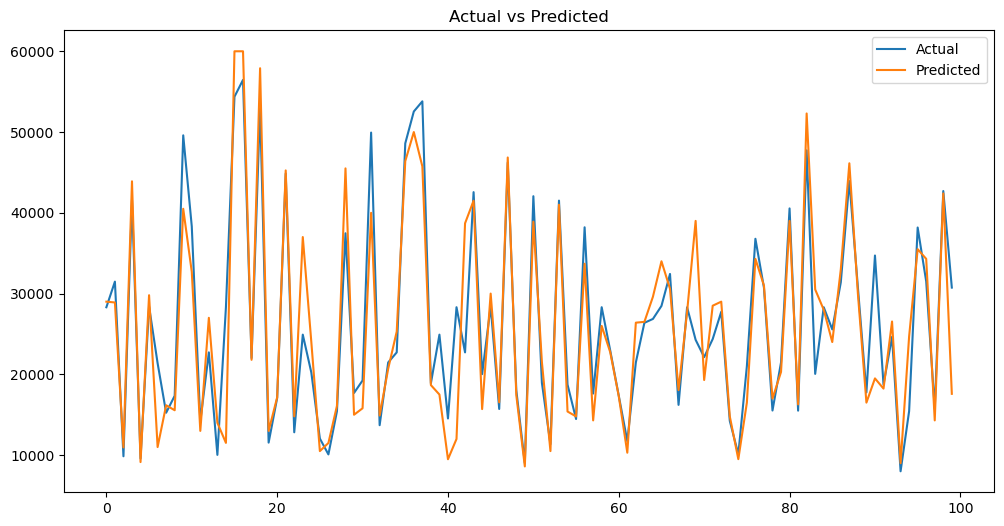

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.2f}'.format


data = pd.read_csv("laptop_trendyol_data.csv")

data = data.drop(["Ekran KartÄ±","Ekran Yenileme HÄ±zÄ±","KullanÄ±m AmacÄ±","Ram (Sistem BelleÄŸi)","Ã‡Ã¶zÃ¼nÃ¼rlÃ¼k","Ä°ÅŸlemci Tipi","Ä°ÅŸletim Sistemi","url"],axis=1)
data=data.rename(columns = {'İşletim Sistemi':'İşletim_Sistemi',"İşlemci Tipi":"İşlemci_Tipi",'Ekran Kartı':'Ekran_Kartı','Ekran Boyutu':'Ekran_Boyutu','Ekran Yenileme Hızı':'Ekran_Yenileme_Hızı','Hard Disk Kapasitesi':'Hard_Disk_Kapasitesi','SSD Kapasitesi':'SSD_Kapasitesi',"Ram (Sistem Belleği)":"Ram"})


data['Garanti Tipi'].replace('Resmi DistribÃ¼tÃ¶r Garantili', 'Resmi Distribütör Garantili', inplace=True)

cleaned_prices = []  

for value in data['price']:
    # Veri virgül içeriyorsa
    if ',' in value:
        cleaned_value = float(value.split(',')[0].replace('.', ''))  # Virgül sonrasını at, noktaları kaldır ve float'a çevir
        cleaned_prices.append(cleaned_value)
    # Veri 'TL' içeriyorsa
    elif 'TL' in value:
        cleaned_value = float(value.replace(' TL', '').replace('.', ''))  # 'TL' ibaresini kaldır, noktaları kaldır ve float'a çevir
        cleaned_prices.append(cleaned_value)
    else:
        cleaned_prices.append(float(value))  # Diğer durumlarda doğrudan float'a çevirip ekle

data['price'] = cleaned_prices  # Temizlenmiş verileri DataFrame'e ekle



def convert_to_gb(capacity):
    if 'TB' in capacity:  
        return float(capacity.replace('TB', '')) * 1024  
    elif 'GB' in capacity:  
        return float(capacity.replace('GB', ''))  
    elif capacity in ['Yok', 'SSD Yok']:  
        return np.nan
    else:
        return capacity  
data['SSD_Kapasitesi'] = data['SSD_Kapasitesi'].apply(lambda x: convert_to_gb(x) if isinstance(x, str) else x)




def convert_to_gb(capacity):
    if 'TB' in capacity:  
        return float(capacity.replace('TB', '')) * 1024  
    elif 'GB' in capacity: 
        return float(capacity.replace('GB', '')) 
    else:
        return capacity  
data['Hard_Disk_Kapasitesi'] = data['Hard_Disk_Kapasitesi'].apply(lambda x: convert_to_gb(x) if isinstance(x, str) else x)




data['Ekran_Boyutu'] = data['Ekran_Boyutu'].replace(['Belirtilmemiş'], np.nan, regex=True)
data['Ekran_Boyutu'] = data['Ekran_Boyutu'].astype(str).str.replace('inç', '').str.replace('inÃ§', '').str.replace(',', '.').astype(float)



data['Ekran_Yenileme_Hızı'] = data['Ekran_Yenileme_Hızı'].replace('Hz', '', regex=True).astype(str).astype(float)



data['Ram'] = data['Ram'].replace('GB', '', regex=True).astype(str).astype(float)






data = data.drop_duplicates()



# Aykırı değerleri belirleme
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Aykırı değerleri filtreleme
outliers = data[(data['price'] < lower_bound) | (data['price'] > upper_bound)]
data = data[(data['price'] >= lower_bound) & (data['price'] <= upper_bound)]


data.drop(["Ekran_Yenileme_Hızı","Garanti Tipi","Hard_Disk_Kapasitesi","Kullanım Amacı"],axis=1,inplace=True)

ortalama = data['Ekran_Boyutu'].mean()
data['Ekran_Boyutu'].fillna(ortalama, inplace=True)

en_sık_değer = data['Ekran_Kartı'].mode()[0]
data['Ekran_Kartı'].fillna(en_sık_değer, inplace=True)

median_değer = data['Ram'].median()
data['Ram'].fillna(median_değer, inplace=True)

en_sık_değer = data['SSD_Kapasitesi'].mode()[0]
data['SSD_Kapasitesi'].fillna(en_sık_değer, inplace=True)

en_sık_değer = data['Çözünürlük'].mode()[0]
data['Çözünürlük'].fillna(en_sık_değer, inplace=True)


en_sık_değer = data['İşlemci_Tipi'].mode()[0]
data['İşlemci_Tipi'].fillna(en_sık_değer, inplace=True)


en_sık_değer = data['İşletim_Sistemi'].mode()[0]
data['İşletim_Sistemi'].fillna(en_sık_değer, inplace=True)





from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
labelEncoder = LabelEncoder()
 

data["Ekran_Kartı"] = labelEncoder.fit_transform(data["Ekran_Kartı"])
data["Çözünürlük"] = labelEncoder.fit_transform(data["Çözünürlük"])
data["İşlemci_Tipi"] = labelEncoder.fit_transform(data["İşlemci_Tipi"])
data["İşletim_Sistemi"] = labelEncoder.fit_transform(data["İşletim_Sistemi"])
data["Marka"] = labelEncoder.fit_transform(data["Marka"])



from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
X = data.drop(['price'], axis=1)
y = data['price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 )

print('x_train :', x_train.shape)
print('x_test :', x_test.shape)
print('y_train :', y_train.shape)
print('y_test :', y_test.shape)


from sklearn.ensemble import RandomForestRegressor#GridSearch ile elde edilen parametreler kullanıldı
rf = RandomForestRegressor(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=300)
rf.fit(x_train,y_train)
y_predict_rf = rf.predict(x_test)
print('mean absolute error: ',mean_absolute_error(y_test, y_predict_rf))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_predict_rf)))
print('Coefficient of determination R^2: ',r2_score(y_test,y_predict_rf))

fig= plt.figure(figsize=(12,6))
result = pd.DataFrame({'Predicted':y_predict_rf,'Actual':y_test})
result = result.reset_index()
result = result.drop(['index'],axis=1)
plt.plot(result[:100])
plt.legend(['Actual','Predicted'])
plt.title('Actual vs Predicted')
plt.show()




In [3]:
import joblib

In [4]:
joblib.dump(rf,"model.pkl")

['model.pkl']